# Análise Completa do Mercado de Estabelecimentos Alimentares em Fortaleza

## 📊 Visão Geral
Este estudo analisa **893 estabelecimentos alimentares** distribuídos em **5 categorias** principais (Restaurante, Padaria, Cafeteria, Drive Thru, Delivery de Comida), identificando padrões de qualidade, distribuição geográfica e oportunidades de mercado através de múltiplas perspectivas analíticas.

## 🎯 Objetivos
1. **Identificar os melhores bairros** para cada tipo de estabelecimento
2. **Revelar padrões de mercado** através de correlações e distribuições
3. **Mapear oportunidades de negócio** baseadas em demanda vs qualidade
4. **Fornecer recomendações** para consumidores e empresários
5. **Criar visualizações interativas** para exploração geográfica dos dados

## 📋 Metodologia
- **Filtro de confiabilidade**: Análises incluem apenas bairros com **10 ou mais estabelecimentos**
- **Tratamento de dados**: Identificação e tratamento de dados ausentes
- **Múltiplas visualizações**: Rankings, heatmaps, scatter plots e análises geográficas
- **Mapeamento interativo**: Visualização geográfica com Folium para estabelecimentos bem avaliados (≥3.5)

## ⚠️ Limitações dos Dados Atuais

### **Quantidade de Informações NaN (Ausentes):**
- **PONTUACAO**: 226 valores ausentes (25.28%)
- **COMENTARIO**: 226 valores ausentes (25.28%)
- **ENDERECO**: 1 valor ausente (0.11%)
- **LOCAL**: 115 valores ausentes (12.86%)
- **TEMPO_ESPERA**: 587 valores ausentes (65.66%)

### **Interpretação dos Dados Ausentes:**
- **Pontuações 0.0**: Representam dados ausentes, não avaliações ruins
- **Cenário atual**: Os dados estão nesse cenário de limitação, requerendo tratamento cuidadoso
- **Impacto**: Análises focam em estabelecimentos com dados válidos para maior confiabilidade
- **Filtros aplicados**: Exclusão de dados ausentes em análises de correlação e qualidade

## 📈 Análises Implementadas

### **1. Panorama Geral do Mercado**
- Distribuição de estabelecimentos por categoria
- Concentração geográfica nos bairros de Fortaleza
- Identificação de segmentos dominantes e oportunidades

### **2. Análise de Qualidade por Segmento**
- Ranking geral de bairros por qualidade média (apenas bairros com 10 ou mais estabelecimentos)
- Análise específica por tipo de estabelecimento (5 categorias)
- Identificação dos melhores bairros para cada categoria

### **3. Análise de Correlações e Padrões**
- **Matriz de correlação**: Relações entre variáveis numéricas (pontuação, comentários, tempos, coordenadas)
- **Tempo Mínimo vs Máximo**: Insights sobre consistência operacional com linha de tendência
- **Popularidade vs Qualidade**: Scatter plot por tipo de estabelecimento (escala logarítmica)

### **4. Mapeamento Geográfico Interativo**
- **Mapa de Fortaleza**: Distribuição dos estabelecimentos bem avaliados (≥3.5)
- **Marcadores coloridos**: Diferenciação visual por tipo de estabelecimento
- **Interatividade**: Popups detalhados e controle de camadas como legenda
- **Análise de densidade**: Top 10 bairros com estabelecimentos bem avaliados
- **Distribuição por tipo**: Gráfico empilhado dos Top 5 bairros

## 🔍 Insights Principais Gerados
- **Concentração geográfica** dos melhores estabelecimentos
- **Padrões operacionais** através de correlações temporais
- **Análise de popularidade** vs qualidade por categoria
- **Benchmarking por bairro** para diferentes tipos de estabelecimento
- **Identificação de clusters** de excelência geográfica
- **Recomendações localizadas** baseadas em densidade de qualidade

## 🛠️ Ferramentas Utilizadas
- **Pandas**: Manipulação e análise de dados
- **Matplotlib/Seaborn**: Visualizações estáticas e gráficos estatísticos
- **Folium**: Mapeamento interativo de Fortaleza
- **NumPy**: Cálculos estatísticos e correlações

In [1]:
# Configuração do ambiente
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import folium

In [2]:
# Carregamento e visão geral dos dados
df_final = pd.read_csv('database/dadosTratados/df_final_comGeo.csv')

print("DATASET OVERVIEW")
print("="*50)
print(f"Total de estabelecimentos: {len(df_final)}")
print(f"Bairros únicos: {df_final['BAIRRO'].nunique()}")
print(f"Tipos de estabelecimento: {df_final['TIPO'].nunique()}")
print(f"Pontuação média geral: {df_final['PONTUACAO'].mean():.2f}")

print(f"\nTIPOS DE ESTABELECIMENTO:")
tipo_counts = df_final['TIPO'].value_counts()
for tipo, count in tipo_counts.items():
    print(f"- {tipo}: {count} unidades")

# Identificar problema de qualidade dos dados
zeros = len(df_final[df_final['PONTUACAO'] == 0])
print(f"\nQUALIDADE DOS DADOS:")
print(f"- Estabelecimentos com pontuação 0.0: {zeros} ({100*zeros/len(df_final):.1f}%)")
print("- Interpretação: Pontuações 0.0 representam dados ausentes, não avaliações ruins")

DATASET OVERVIEW
Total de estabelecimentos: 893
Bairros únicos: 80
Tipos de estabelecimento: 5
Pontuação média geral: 3.31

TIPOS DE ESTABELECIMENTO:
- Restaurante: 243 unidades
- Delivery De Comida: 214 unidades
- Cafeteria: 201 unidades
- Padaria: 185 unidades
- Drive Thru: 50 unidades

QUALIDADE DOS DADOS:
- Estabelecimentos com pontuação 0.0: 225 (25.2%)
- Interpretação: Pontuações 0.0 representam dados ausentes, não avaliações ruins


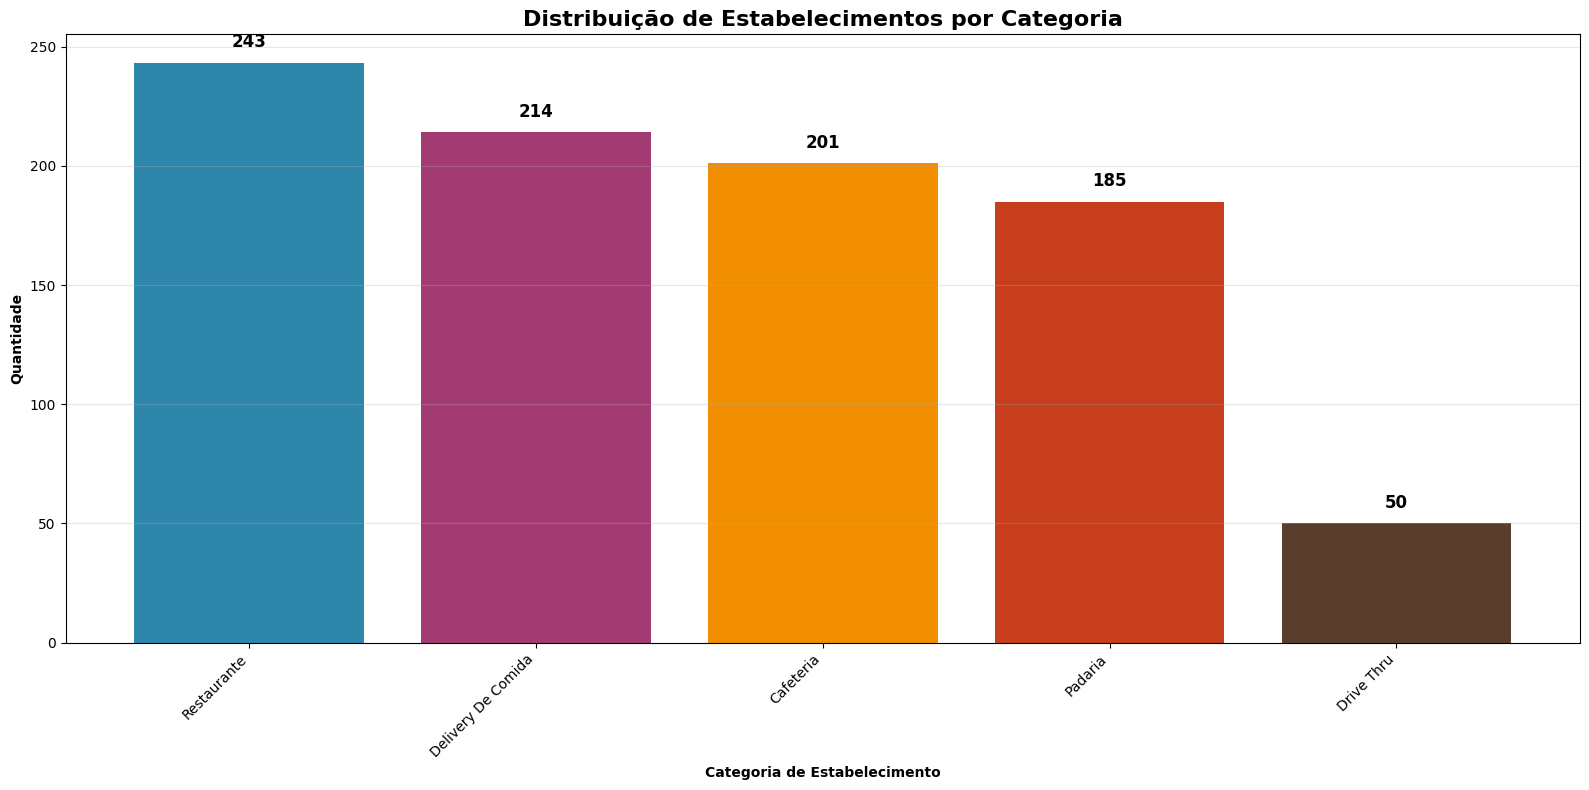

INSIGHTS DE MERCADO:
- Segmento dominante: Restaurante (243 unidades)
- Segmento menor: Drive Thru (50 unidades)
- Diferença entre maior e menor: 193 unidades


In [3]:
# 1.1 Distribuição de estabelecimentos por tipo
plt.figure(figsize=(16, 8))
tipo_counts = df_final['TIPO'].value_counts()

bars = plt.bar(tipo_counts.index, tipo_counts.values, 
               color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#593E2E'])

# Valores nas barras
for bar, value in zip(bars, tipo_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             str(value), ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.title('Distribuição de Estabelecimentos por Categoria', fontsize=16, fontweight='bold')
plt.xlabel('Categoria de Estabelecimento', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("INSIGHTS DE MERCADO:")
print(f"- Segmento dominante: {tipo_counts.index[0]} ({tipo_counts.iloc[0]} unidades)")
print(f"- Segmento menor: {tipo_counts.index[-1]} ({tipo_counts.iloc[-1]} unidades)")
print(f"- Diferença entre maior e menor: {tipo_counts.iloc[0] - tipo_counts.iloc[-1]} unidades")

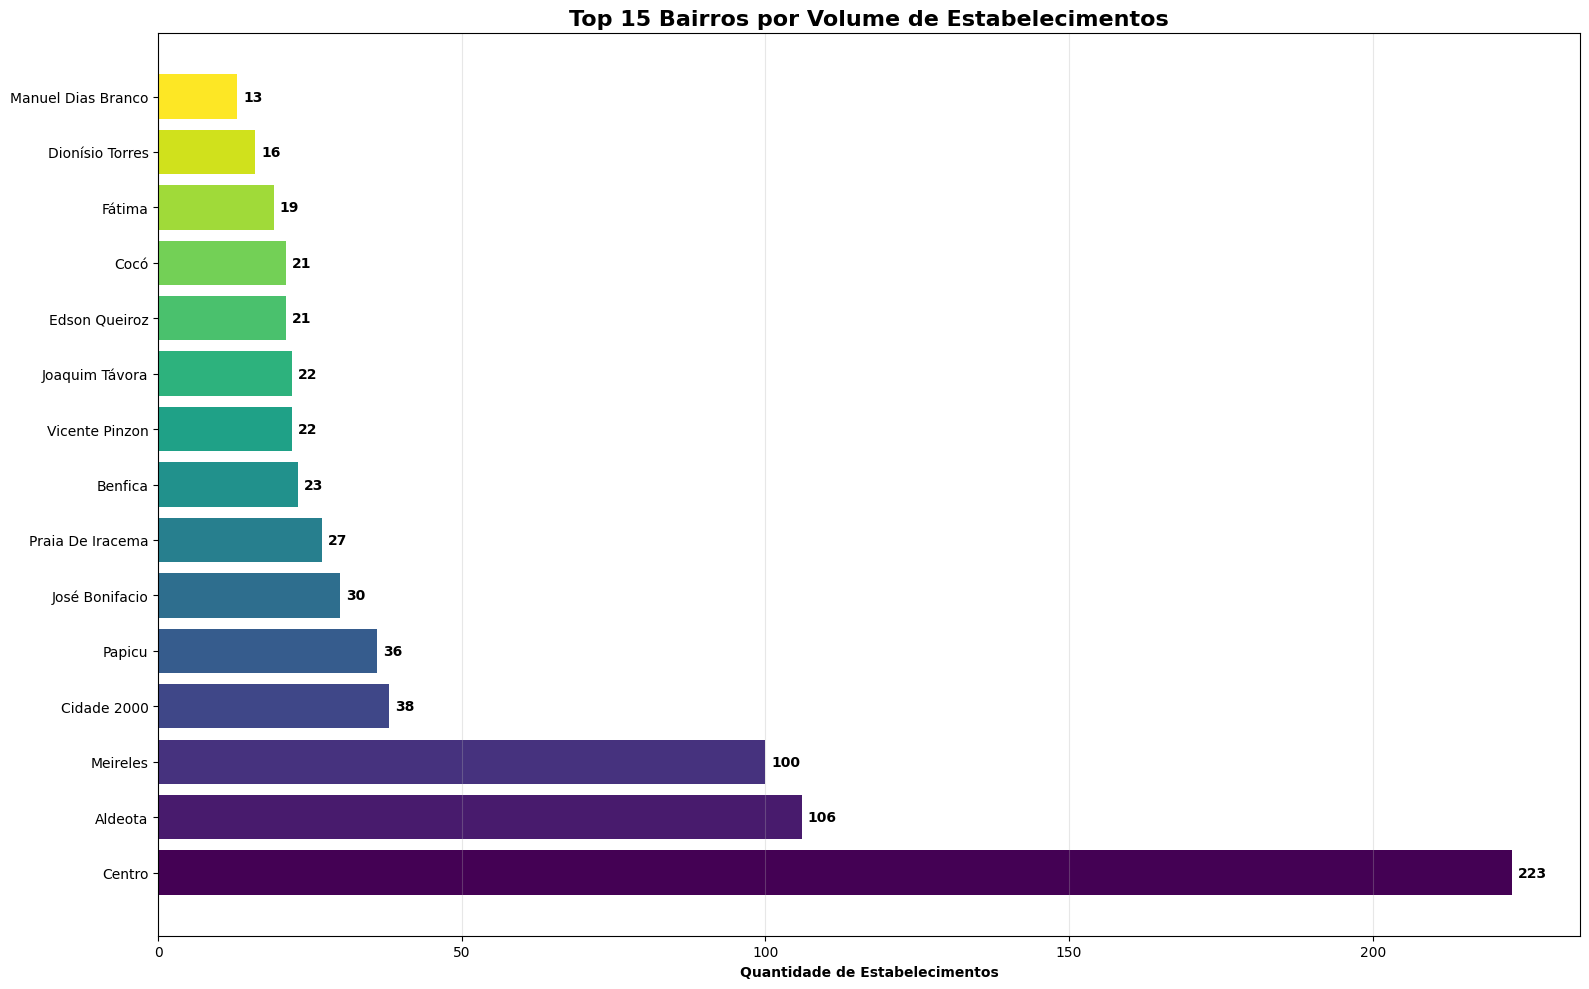

CONCENTRAÇÃO GEOGRÁFICA:
- Bairro líder: Centro (223 estabelecimentos)
- Top 15 bairros concentram 80.3% do mercado total
- Mercado altamente concentrado nos centros urbanos


In [4]:
# 1.2 Concentração geográfica dos estabelecimentos
plt.figure(figsize=(16, 10))
bairro_counts = df_final['BAIRRO'].value_counts().head(15)

bars = plt.barh(range(len(bairro_counts)), bairro_counts.values, 
                color=plt.cm.viridis(np.linspace(0, 1, len(bairro_counts))))

for i, (bar, value) in enumerate(zip(bars, bairro_counts.values)):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
             str(value), ha='left', va='center', fontweight='bold')

plt.yticks(range(len(bairro_counts)), bairro_counts.index)
plt.title('Top 15 Bairros por Volume de Estabelecimentos', fontsize=16, fontweight='bold')
plt.xlabel('Quantidade de Estabelecimentos', fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

concentracao = (bairro_counts.sum() / len(df_final)) * 100
print("CONCENTRAÇÃO GEOGRÁFICA:")
print(f"- Bairro líder: {bairro_counts.index[0]} ({bairro_counts.iloc[0]} estabelecimentos)")
print(f"- Top 15 bairros concentram {concentracao:.1f}% do mercado total")
print(f"- Mercado altamente concentrado nos centros urbanos")

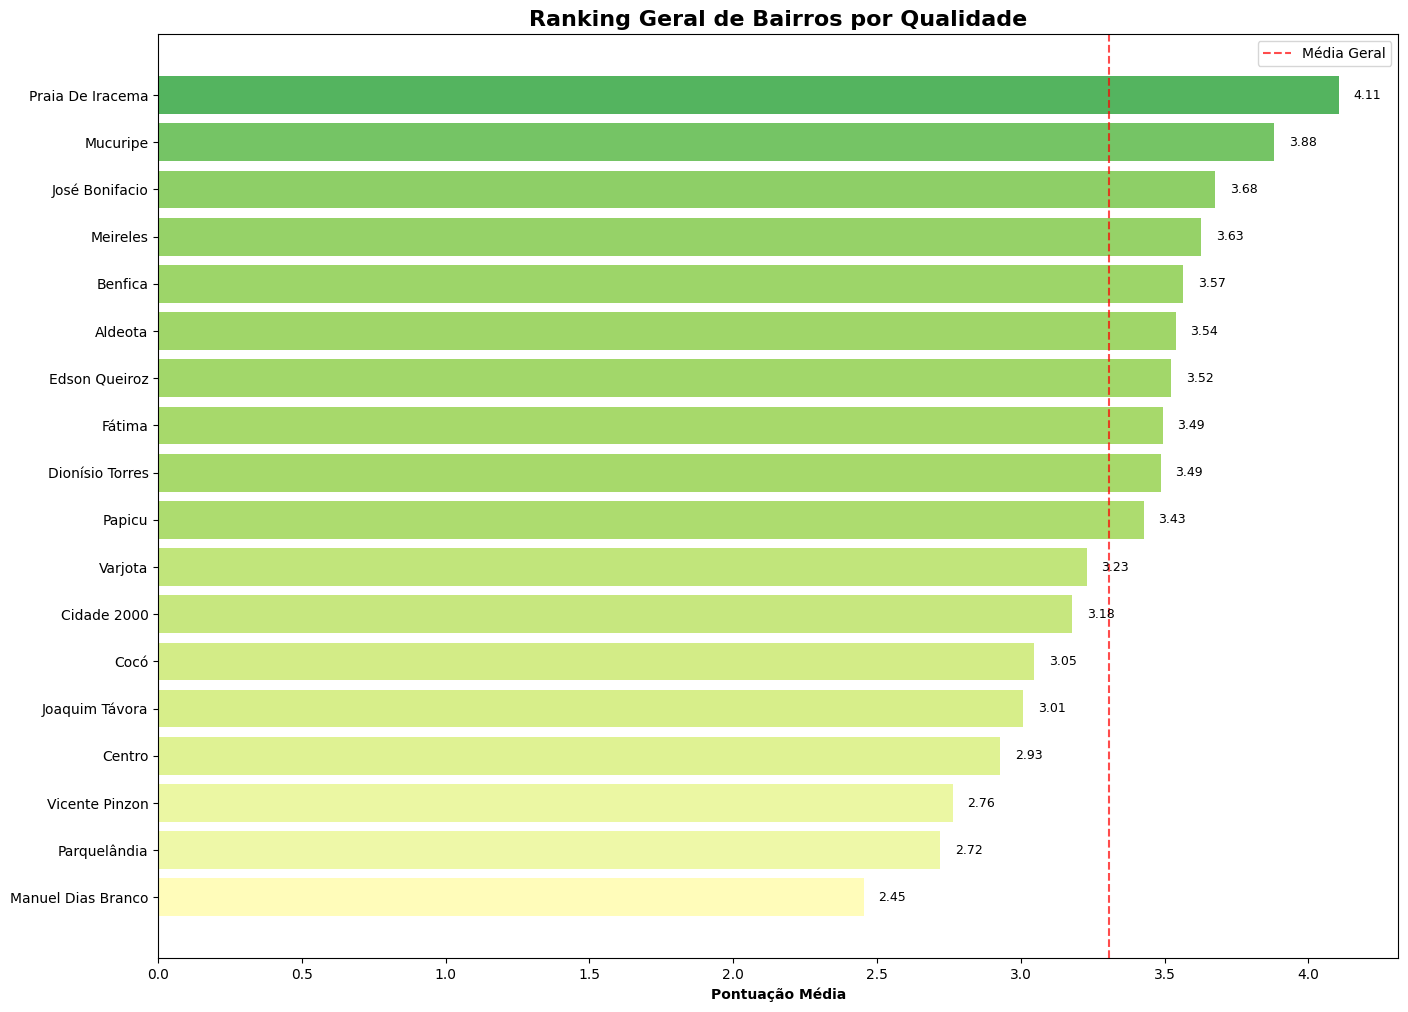

RANKING DE QUALIDADE GERAL:
- Top 3 bairros: Praia De Iracema, Mucuripe, José Bonifacio
- Menores pontuações: Manuel Dias Branco, Parquelândia, Vicente Pinzon


In [16]:
# 2.1 Ranking geral de bairros por qualidade
plt.figure(figsize=(16, 12))

# Agrupar por bairro: média da pontuação, quantidade de estabelecimentos e soma dos comentários
bairro_analysis = df_final.groupby('BAIRRO').agg({
    'PONTUACAO': 'mean',
    'NOME': 'count',
    'NUM_COMENTARIO': 'sum'
}).reset_index()

# Filtrar bairros com pelo menos 10 estabelecimentos
bairro_analysis = bairro_analysis[bairro_analysis['NOME'] >= 10].sort_values('PONTUACAO', ascending=True)

bars = plt.barh(range(len(bairro_analysis)), bairro_analysis['PONTUACAO'], 
                color=plt.cm.RdYlGn(bairro_analysis['PONTUACAO']/5))

plt.yticks(range(len(bairro_analysis)), bairro_analysis['BAIRRO'], fontsize=10)
plt.xlabel('Pontuação Média', fontweight='bold')
plt.title('Ranking Geral de Bairros por Qualidade', fontsize=16, fontweight='bold')
plt.axvline(x=df_final['PONTUACAO'].mean(), color='red', linestyle='--', alpha=0.7, label='Média Geral')

# Adicionar valores
for i, row in bairro_analysis.iterrows():
    plt.text(row['PONTUACAO'] + 0.05, list(bairro_analysis.index).index(i), 
             f"{row['PONTUACAO']:.2f}", va='center', fontsize=9)

plt.legend()
plt.show()

print("RANKING DE QUALIDADE GERAL:")
top_3 = bairro_analysis.tail(3)['BAIRRO'].tolist()
bottom_3 = bairro_analysis.head(3)['BAIRRO'].tolist()
print(f"- Top 3 bairros: {', '.join(reversed(top_3))}")
print(f"- Menores pontuações: {', '.join(bottom_3)}")

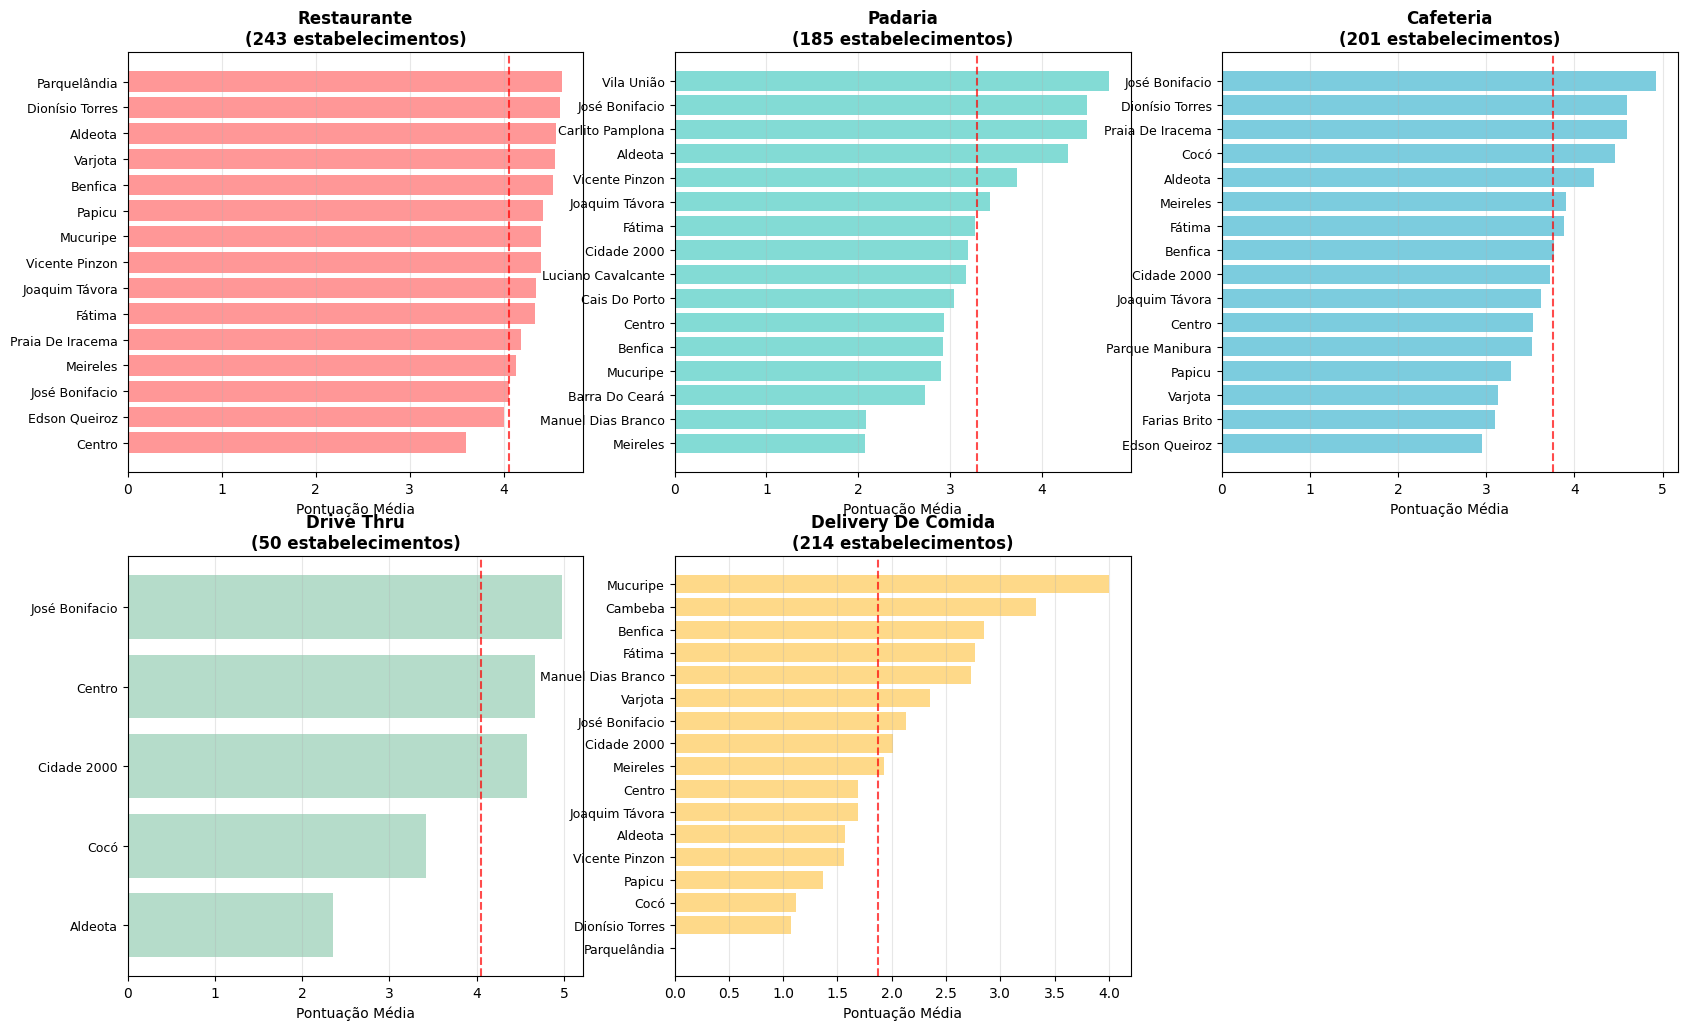

LÍDERES POR CATEGORIA:
- Restaurante: Parquelândia (melhor) | Centro (menor pontuação)
  243 estabelecimentos em 15 bairros
- Padaria: Vila União (melhor) | Meireles (menor pontuação)
  185 estabelecimentos em 16 bairros
- Cafeteria: José Bonifacio (melhor) | Edson Queiroz (menor pontuação)
  201 estabelecimentos em 16 bairros
- Drive Thru: José Bonifacio (melhor) | Aldeota (menor pontuação)
  50 estabelecimentos em 5 bairros
- Delivery De Comida: Mucuripe (melhor) | Parquelândia (menor pontuação)
  214 estabelecimentos em 17 bairros


In [6]:
# 2.2 Análise específica por tipo de estabelecimento
tipos_para_analisar = ['Restaurante', 'Padaria', 'Cafeteria', 'Drive Thru', 'Delivery De Comida']
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

resultados_por_tipo = {}

for idx, tipo in enumerate(tipos_para_analisar):
    if idx < len(axes):
        ax = axes[idx]
        
        # Filtrar dados do tipo
        df_tipo = df_final[df_final['TIPO'] == tipo]
        
        if len(df_tipo) > 0:
            # Agrupar por bairro
            bairro_tipo = df_tipo.groupby('BAIRRO').agg({
                'PONTUACAO': 'mean',
                'NOME': 'count'
            }).reset_index()
            
            # Filtrar bairros com pelo menos 3 estabelecimentos
            bairro_tipo = bairro_tipo[bairro_tipo['NOME'] >= 3].sort_values('PONTUACAO', ascending=True)
            
            if len(bairro_tipo) > 0:
                bars = ax.barh(range(len(bairro_tipo)), bairro_tipo['PONTUACAO'], 
                              color=cores[idx], alpha=0.7)
                
                ax.set_yticks(range(len(bairro_tipo)))
                ax.set_yticklabels(bairro_tipo['BAIRRO'], fontsize=9)
                ax.set_xlabel('Pontuação Média')
                ax.set_title(f'{tipo}\n({len(df_tipo)} estabelecimentos)', fontweight='bold')
                ax.axvline(x=df_tipo['PONTUACAO'].mean(), color='red', linestyle='--', alpha=0.7)
                ax.grid(axis='x', alpha=0.3)
                
                # Salvar resultados
                if len(bairro_tipo) > 0:
                    resultados_por_tipo[tipo] = {
                        'melhor': bairro_tipo.iloc[-1]['BAIRRO'],
                        'pior': bairro_tipo.iloc[0]['BAIRRO'],
                        'total': len(df_tipo),
                        'bairros_analisados': len(bairro_tipo)
                    }

# Remover subplot vazio
if len(tipos_para_analisar) < len(axes):
    fig.delaxes(axes[-1])

plt.show()

print("LÍDERES POR CATEGORIA:")
for tipo, dados in resultados_por_tipo.items():
    print(f"- {tipo}: {dados['melhor']} (melhor) | {dados['pior']} (menor pontuação)")
    print(f"  {dados['total']} estabelecimentos em {dados['bairros_analisados']} bairros")

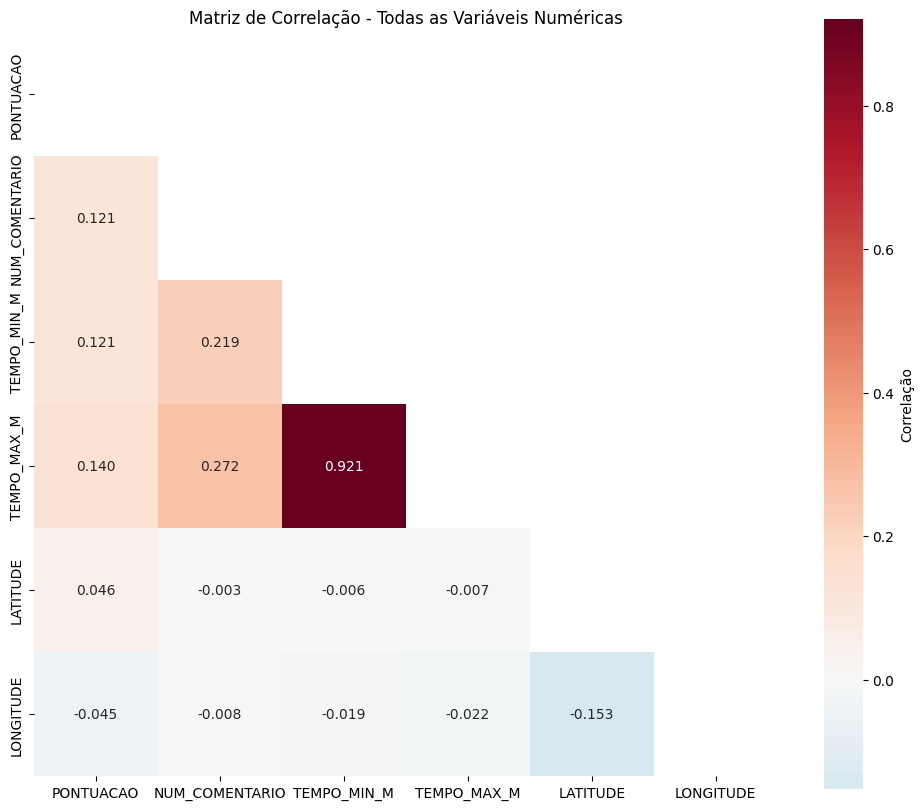

In [7]:
# Selecionar apenas colunas numéricas relevantes
colunas_numericas = ['PONTUACAO', 'NUM_COMENTARIO', 'TEMPO_MIN_M', 'TEMPO_MAX_M', 'LATITUDE', 'LONGITUDE']
df_corr = df_final[colunas_numericas].dropna()

plt.figure(figsize=(12, 10))
correlation_matrix = df_corr.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            square=True,
            cbar_kws={'label': 'Correlação'})

plt.title('Matriz de Correlação - Todas as Variáveis Numéricas')
plt.show()

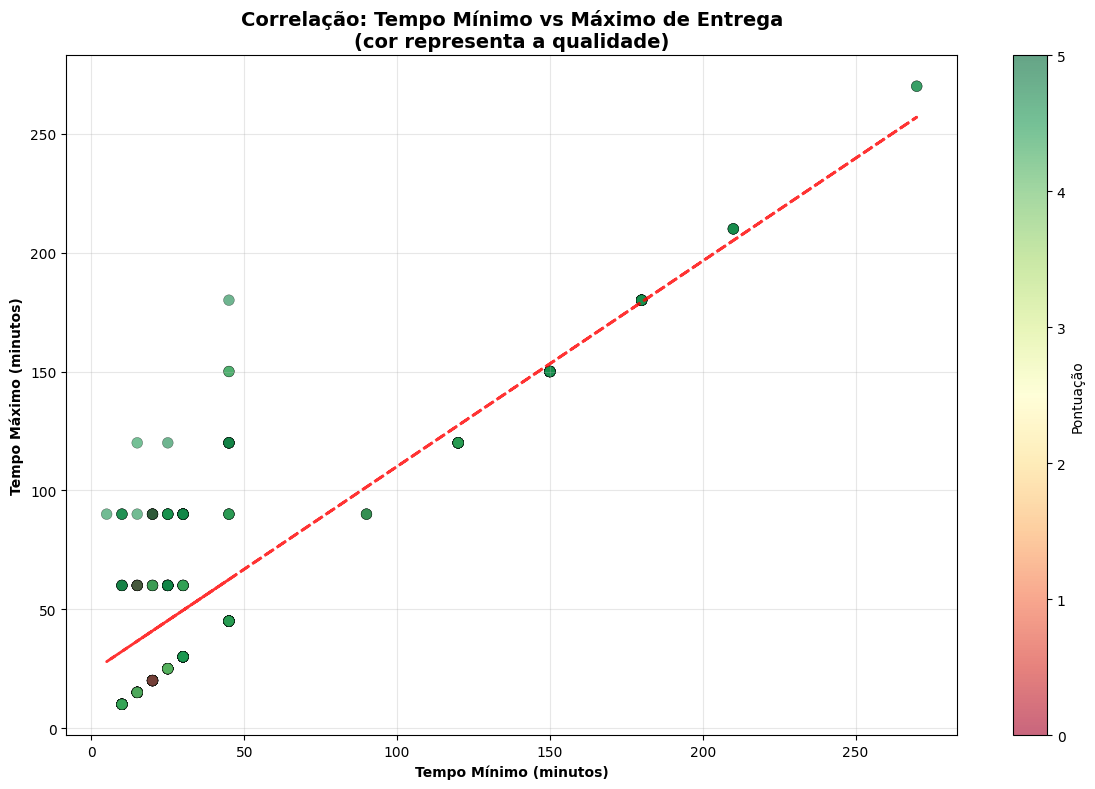

ANÁLISE DOS TEMPOS DE ENTREGA:
- Correlação MIN vs MAX: 0.876
- Diferença média: 16.5 min
- Tempo mínimo mais comum: 30 min
- Tempo máximo mais comum: 60 min


In [8]:
# Análise de correlação de tempos de entrega
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Filtrar dados válidos de tempo
df_tempo = df_final[(df_final['TEMPO_MIN_M'] > 0) & (df_final['TEMPO_MAX_M'] > 0)]

scatter = ax.scatter(df_tempo['TEMPO_MIN_M'], df_tempo['TEMPO_MAX_M'], 
                    alpha=0.6, s=60, c=df_tempo['PONTUACAO'], 
                    cmap='RdYlGn', edgecolors='black', linewidth=0.3)

# Linha de tendência
z = np.polyfit(df_tempo['TEMPO_MIN_M'], df_tempo['TEMPO_MAX_M'], 1)
p = np.poly1d(z)
ax.plot(df_tempo['TEMPO_MIN_M'], p(df_tempo['TEMPO_MIN_M']), "r--", alpha=0.8, linewidth=2)

ax.set_xlabel('Tempo Mínimo (minutos)', fontweight='bold')
ax.set_ylabel('Tempo Máximo (minutos)', fontweight='bold')
ax.set_title('Correlação: Tempo Mínimo vs Máximo de Entrega\n(cor representa a qualidade)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.colorbar(scatter, ax=ax, label='Pontuação')
plt.tight_layout()
plt.show()

# Estatísticas dos tempos
print("ANÁLISE DOS TEMPOS DE ENTREGA:")
print(f"- Correlação MIN vs MAX: {df_tempo['TEMPO_MIN_M'].corr(df_tempo['TEMPO_MAX_M']):.3f}")
print(f"- Diferença média: {(df_tempo['TEMPO_MAX_M'] - df_tempo['TEMPO_MIN_M']).mean():.1f} min")
print(f"- Tempo mínimo mais comum: {df_tempo['TEMPO_MIN_M'].mode().iloc[0]:.0f} min")
print(f"- Tempo máximo mais comum: {df_tempo['TEMPO_MAX_M'].mode().iloc[0]:.0f} min")

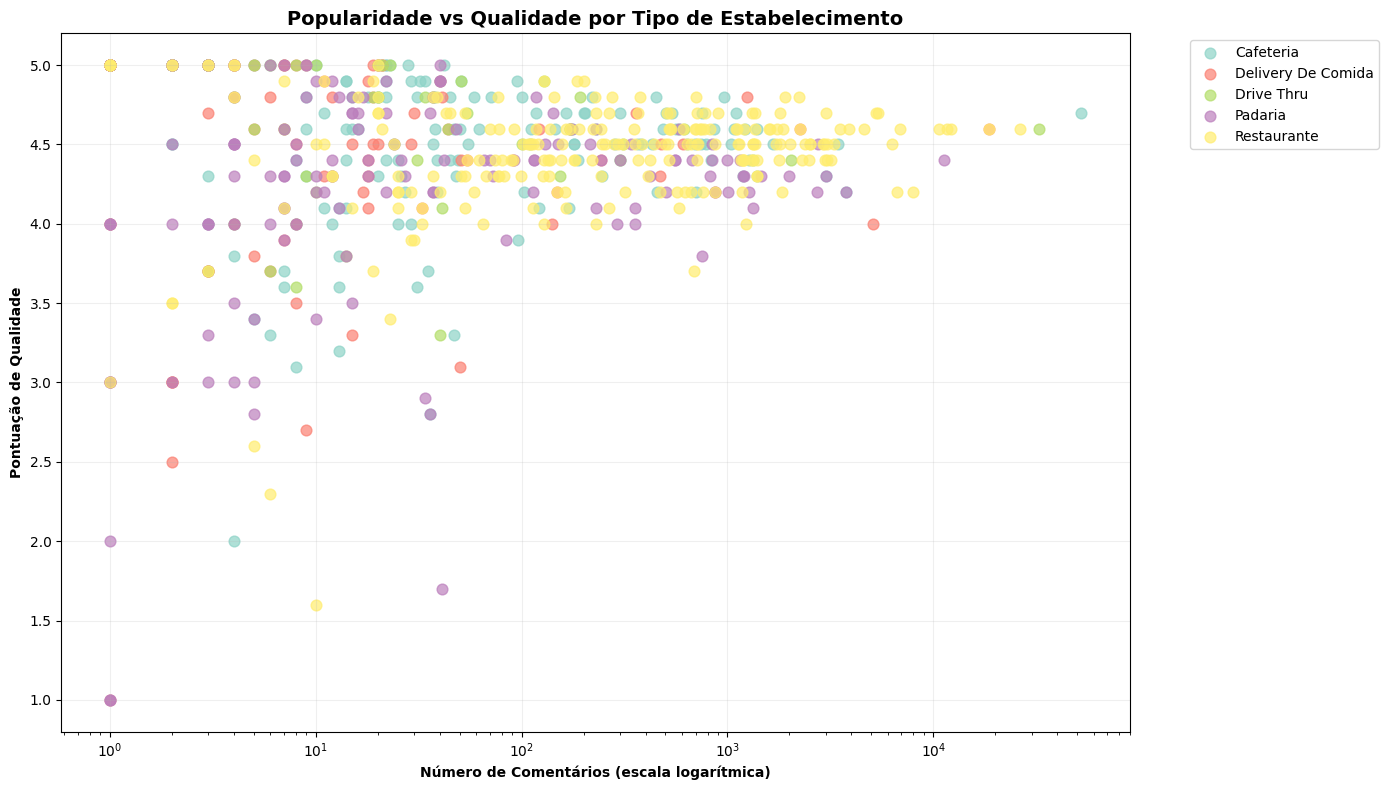

ANÁLISE POPULARIDADE vs QUALIDADE:
- Cafeteria: Correlação = 0.023 (167 estabelecimentos)
- Delivery De Comida: Correlação = 0.019 (91 estabelecimentos)
- Drive Thru: Correlação = -0.006 (44 estabelecimentos)
- Padaria: Correlação = 0.034 (144 estabelecimentos)
- Restaurante: Correlação = 0.090 (222 estabelecimentos)


In [9]:
# Análise de popularidade vs qualidade por tipo
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Filtrar dados válidos
df_validos = df_final[(df_final['NUM_COMENTARIO'] > 0) & (df_final['PONTUACAO'] > 0)]

tipos = df_validos['TIPO'].unique()
cores = plt.cm.Set3(np.linspace(0, 1, len(tipos)))

for i, tipo in enumerate(tipos):
    df_tipo = df_validos[df_validos['TIPO'] == tipo]
    ax.scatter(df_tipo['NUM_COMENTARIO'], df_tipo['PONTUACAO'], 
               alpha=0.7, s=60, label=tipo, color=cores[i])

ax.set_xlabel('Número de Comentários (escala logarítmica)', fontweight='bold')
ax.set_ylabel('Pontuação de Qualidade', fontweight='bold')
ax.set_title('Popularidade vs Qualidade por Tipo de Estabelecimento', 
             fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

# Estatísticas de popularidade vs qualidade
print("ANÁLISE POPULARIDADE vs QUALIDADE:")
for tipo in tipos:
    df_tipo = df_validos[df_validos['TIPO'] == tipo]
    if len(df_tipo) > 0:
        corr = df_tipo['NUM_COMENTARIO'].corr(df_tipo['PONTUACAO'])
        print(f"- {tipo}: Correlação = {corr:.3f} ({len(df_tipo)} estabelecimentos)")

In [10]:
# Mapa interativo de Fortaleza com Folium
print("Criando mapa interativo de Fortaleza...")

# Garante que df_mapa está definido (caso a célula anterior não tenha sido executada)
if 'df_mapa' not in locals():
    df_mapa = df_final[df_final['PONTUACAO'] >= 3.5].copy()

# Centro de Fortaleza (aproximadamente)
centro_fortaleza = [-3.7319, -38.5267]

# Criar mapa base
mapa = folium.Map(
    location=centro_fortaleza,
    zoom_start=11,
    tiles='OpenStreetMap'
)

# Cores para os marcadores por tipo
cores_folium = {
    'Restaurante': 'red',
    'Padaria': 'blue', 
    'Cafeteria': 'green',
    'Drive Thru': 'purple',
    'Delivery De Comida': 'orange'
}

# Criar grupos de marcadores com nomes descritivos (funciona como legenda)
grupos = {}
for tipo in df_mapa['TIPO'].unique():
    df_tipo = df_mapa[df_mapa['TIPO'] == tipo]
    simbolo_cor = {'red': '🔴', 'blue': '🔵', 'green': '🟢', 'purple': '🟣', 'orange': '🟠'}
    cor = cores_folium.get(tipo, 'gray')
    
    # Nome do grupo já inclui o símbolo colorido
    nome_grupo = f"{simbolo_cor.get(cor, '⚪')} {tipo} ({len(df_tipo)})"
    grupos[tipo] = folium.FeatureGroup(name=nome_grupo)
    
    for idx, row in df_tipo.iterrows():
        popup_text = f"""
        <b>{row['NOME']}</b><br>
        Tipo: {row['TIPO']}<br>
        Bairro: {row['BAIRRO']}<br>
        Pontuação: {row['PONTUACAO']:.1f}<br>
        Comentários: {row['NUM_COMENTARIO']}<br>
        Tempo: {row['TEMPO_MIN_M']}-{row['TEMPO_MAX_M']} min
        """
        
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=folium.Popup(popup_text, max_width=250),
            tooltip=f"{row['NOME']} - {row['PONTUACAO']:.1f}⭐",
            icon=folium.Icon(
                color=cor,
                icon='cutlery',
                prefix='fa'
            )
        ).add_to(grupos[tipo])
    
    grupos[tipo].add_to(mapa)

# Adicionar controle de camadas (que agora funciona como legenda)
folium.LayerControl(position='topright', collapsed=False).add_to(mapa)

# Mostrar o mapa no notebook (se suportado)
mapa

Criando mapa interativo de Fortaleza...


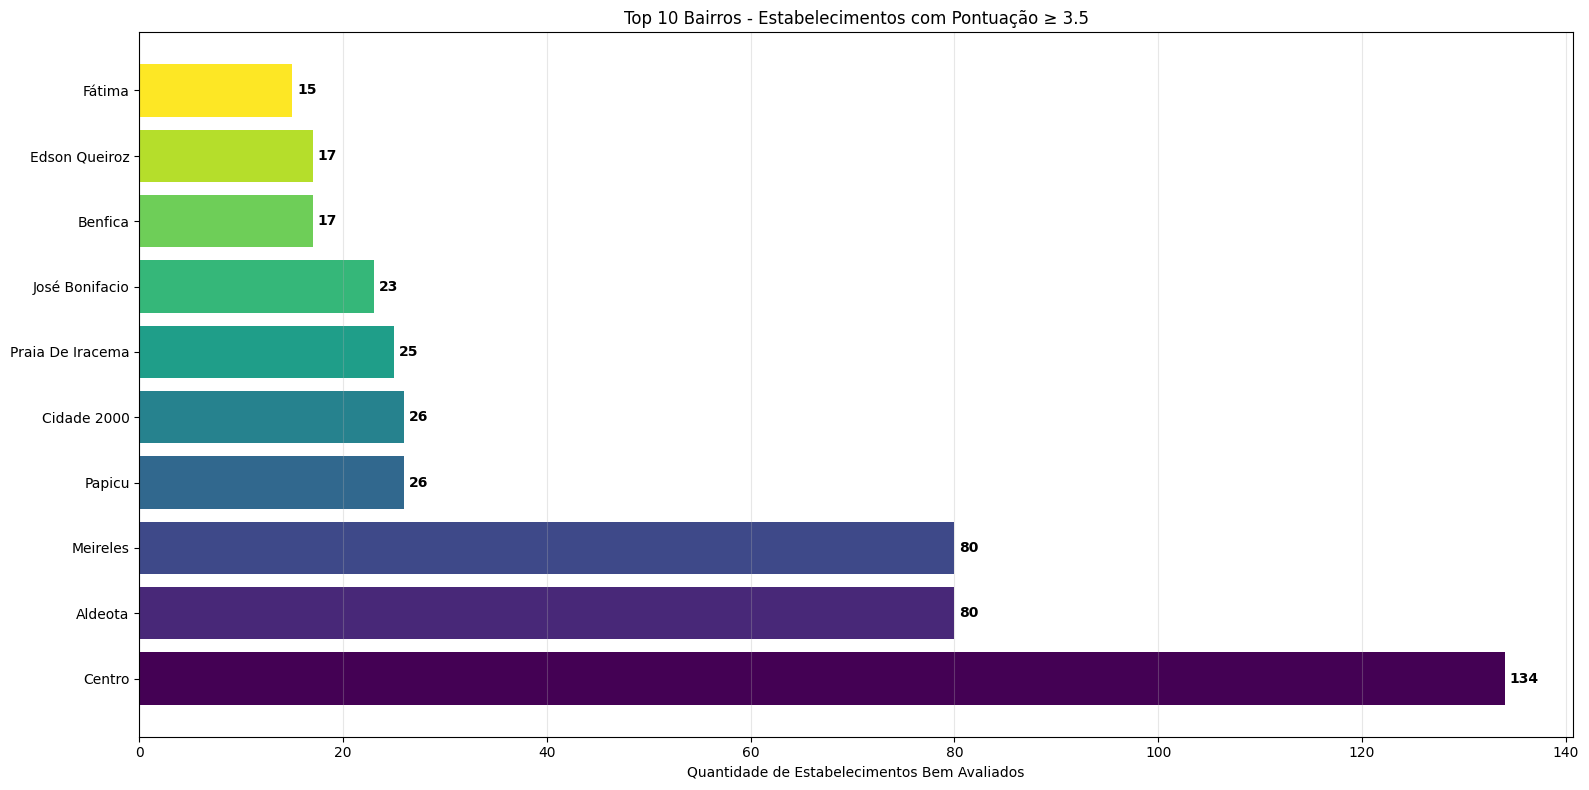

In [11]:
# Análise de densidade geográfica por bairro

# Top 10 bairros com mais estabelecimentos bem avaliados
bairros_top = df_mapa['BAIRRO'].value_counts().head(10)

# Gráfico 1: Top bairros com estabelecimentos bem avaliados
plt.figure(figsize=(16, 8))
bars1 = plt.barh(range(len(bairros_top)), bairros_top.values, 
                color=plt.cm.viridis(np.linspace(0, 1, len(bairros_top))))

plt.yticks(range(len(bairros_top)), bairros_top.index)
plt.xlabel('Quantidade de Estabelecimentos Bem Avaliados')
plt.title('Top 10 Bairros - Estabelecimentos com Pontuação ≥ 3.5')
plt.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, (bar, value) in enumerate(zip(bars1, bairros_top.values)):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             str(value), ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

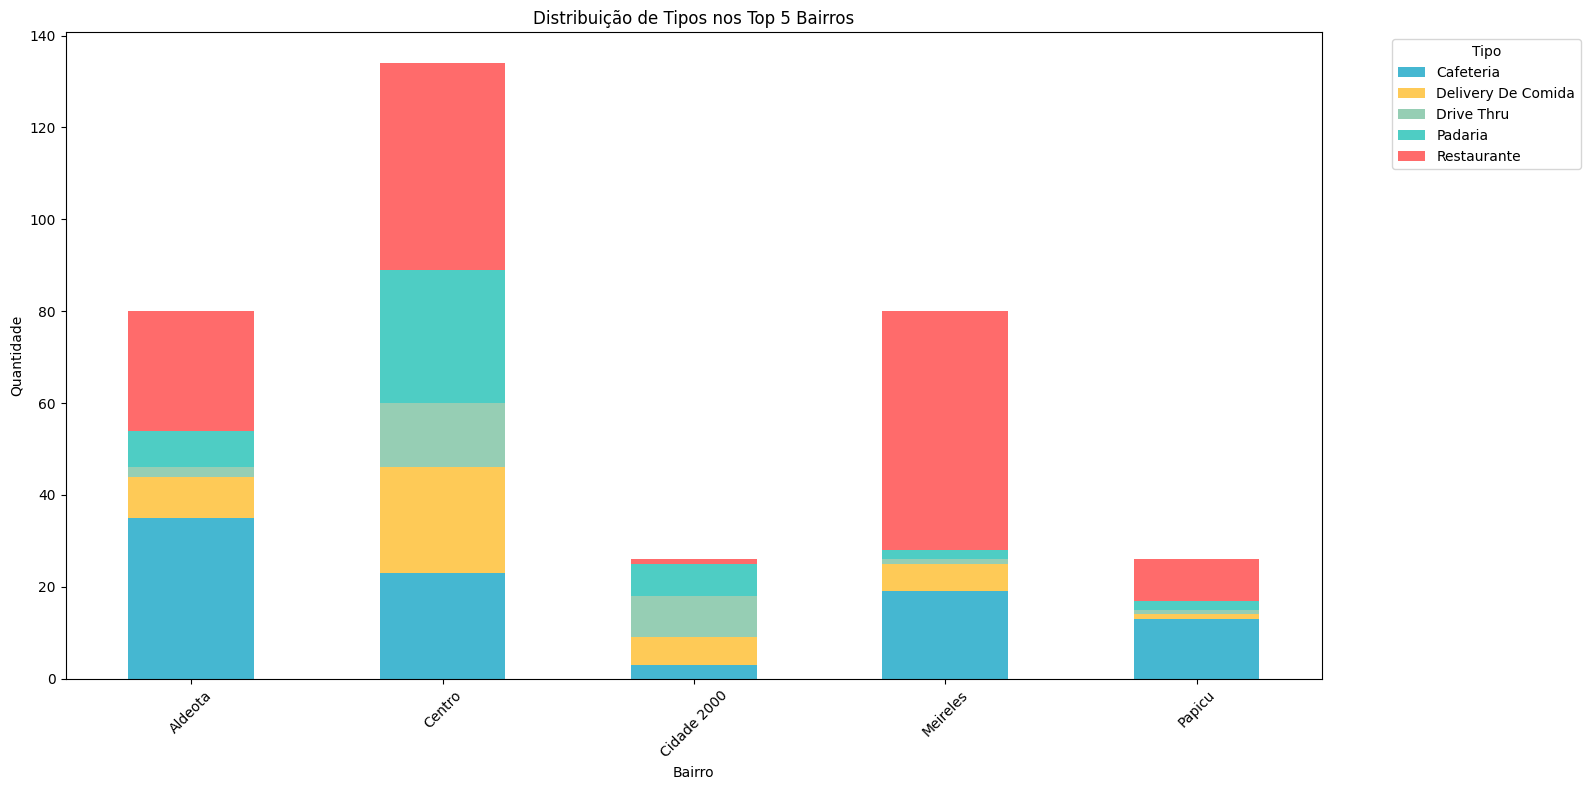

ANÁLISE GEOGRÁFICA FINAL:
- Total de estabelecimentos bem avaliados: 629
- Bairros representados: 65
- Concentração no top 5 bairros: 55.0%
- Pontuação média geral: 4.53

MELHORES BAIRROS POR DENSIDADE DE QUALIDADE:
- Centro: 134 estabelecimentos (média: 4.56)
  Tipos dominantes: Restaurante (45), Padaria (29)
- Aldeota: 80 estabelecimentos (média: 4.57)
  Tipos dominantes: Cafeteria (35), Restaurante (26)
- Meireles: 80 estabelecimentos (média: 4.49)
  Tipos dominantes: Restaurante (52), Cafeteria (19)
- Papicu: 26 estabelecimentos (média: 4.50)
  Tipos dominantes: Cafeteria (13), Restaurante (9)
- Cidade 2000: 26 estabelecimentos (média: 4.65)
  Tipos dominantes: Drive Thru (9), Padaria (7)


In [12]:
# Distribuição por tipo nos top bairros
if 'cores_tipo' not in globals():
    cores_tipo = {'Restaurante': '#FF6B6B', 'Padaria': '#4ECDC4', 'Cafeteria': '#45B7D1', 'Drive Thru': '#96CEB4', 'Delivery De Comida': '#FECA57'}

plt.figure(figsize=(16, 8))
top_5_bairros = bairros_top.head(5).index
df_top_bairros = df_mapa[df_mapa['BAIRRO'].isin(top_5_bairros)]

tipo_bairro_pivot = df_top_bairros.groupby(['BAIRRO', 'TIPO']).size().unstack(fill_value=0)
tipo_bairro_pivot.plot(kind='bar', stacked=True, figsize=(16, 8),
                       color=[cores_tipo.get(col, '#999999') for col in tipo_bairro_pivot.columns])

plt.title('Distribuição de Tipos nos Top 5 Bairros')
plt.xlabel('Bairro')
plt.ylabel('Quantidade')
plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Estatísticas finais
print("ANÁLISE GEOGRÁFICA FINAL:")
print(f"- Total de estabelecimentos bem avaliados: {len(df_mapa)}")
print(f"- Bairros representados: {df_mapa['BAIRRO'].nunique()}")
print(f"- Concentração no top 5 bairros: {len(df_top_bairros)/len(df_mapa)*100:.1f}%")
print(f"- Pontuação média geral: {df_mapa['PONTUACAO'].mean():.2f}")

print(f"\nMELHORES BAIRROS POR DENSIDADE DE QUALIDADE:")
for bairro in bairros_top.head(5).index:
    df_bairro = df_mapa[df_mapa['BAIRRO'] == bairro]
    media_bairro = df_bairro['PONTUACAO'].mean()
    tipos_bairro = df_bairro['TIPO'].value_counts().head(2)
    print(f"- {bairro}: {len(df_bairro)} estabelecimentos (média: {media_bairro:.2f})")
    print(f"  Tipos dominantes: {tipos_bairro.index[0]} ({tipos_bairro.iloc[0]}), {tipos_bairro.index[1]} ({tipos_bairro.iloc[1]})")